<a href="https://colab.research.google.com/github/VctrEman/Optimization-with-Deep-Learning/blob/main/CO2_cars_emissions_regression_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-12-28 12:42:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.05s   

2020-12-28 12:42:46 (1.40 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Usar a técnica de split

In [ ]:
data = pd.read_csv("FuelConsumption.csv")
# take a look at the dataset
data.head()

#posso aplicar a tecnica de visualização que aprendi no housing

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
data.describe()
#percebe-se uma continuidade nos quartis, a amostra parece boa

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
#['MODELYEAR','FUELCONSUMPTION_COMB_MPG','VEHICLECLASS','TRANSMISSION','MODEL','MAKE','FUELTYPE']
#selecionando os parametros convenientes
sdata = data.drop(['MODELYEAR',], axis = 1) 
sdata.head()


,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
sdata.info()
np.shape(sdata)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MAKE                      1067 non-null   object 
 1   MODEL                     1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 100.2+ KB


(1067, 12)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

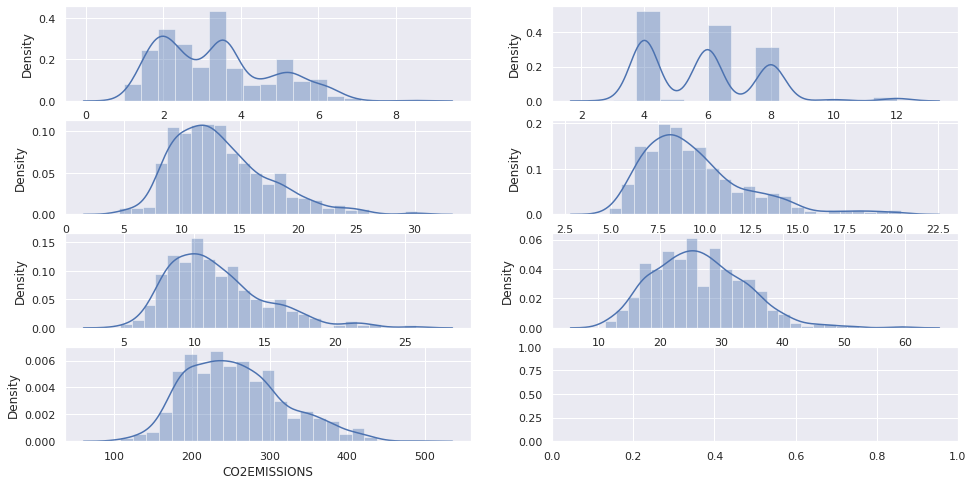

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(16, 8))  #sao 4 colunas, dai fiz 2x2
index = 0
axs = axs.flatten()                                     #oq e isso
for k,v in  sdata.select_dtypes(include=['float64','int']).items():
    sns.distplot(v, ax=axs[index])
    index += 1
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

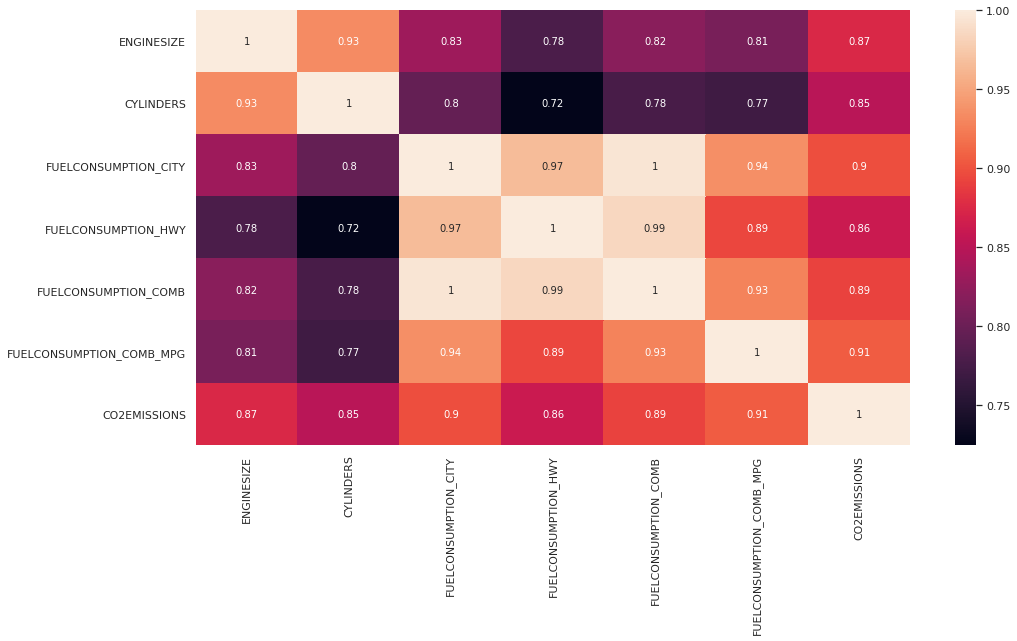

In [ ]:
#separar os dados para treino e para teste, mas antes disso ver quais tem melhor correlação com o CO2
plt.figure(figsize=(16, 8))
sns.heatmap(sdata.corr().abs(),  annot=True)
#todos parecem ter uma otima relação, a pior foi 0.85!!!

In [ ]:
#separando os dados em função do alvo o CO2

X = sdata.drop(['CO2EMISSIONS'], axis = 1) 
y = sdata['CO2EMISSIONS']

In [ ]:
#separação dos dados para treino e teste

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [ ]:
#lidando com categorical data
#pegando as colunas object
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

#certificando q ta no treino e teste
good_label_cols = [col for col in object_cols if set(X_train[col]) == set(X_test[col])]

bad_label_cols = list(set(object_cols)-set(good_label_cols))
print(bad_label_cols)
# pegando o numero de variaveis categoricas (nunique)
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

['TRANSMISSION', 'MAKE', 'MODEL']


[('FUELTYPE', 4),
 ('VEHICLECLASS', 16),
 ('TRANSMISSION', 22),
 ('MAKE', 39),
 ('MODEL', 518)]

In [ ]:
#drop model, make, high cardinality
X_train_c = X_train.drop( bad_label_cols, axis = 1)
X_test_c = X_test.drop( bad_label_cols, axis = 1)
y_train_c, y_test_c =  y_train, y_test

In [ ]:
#now i also fuel type and vehicle class as object input 
print(X_train_c.select_dtypes(np.object))

object_cols = [col for col in X_train_c.columns if X_train_c[col].dtype == "object"]


                 VEHICLECLASS FUELTYPE
798                TWO-SEATER        Z
1052              SUV - SMALL        Z
42             SUV - STANDARD        Z
304                 FULL-SIZE        X
774                TWO-SEATER        Z
...                       ...      ...
456   PICKUP TRUCK - STANDARD        E
360               SUV - SMALL        X
709                  MID-SIZE        X
439               VAN - CARGO        X
174                  MID-SIZE        Z

[746 rows x 2 columns]


In [ ]:
#for xgb, normalize data is good, but i cant normalize encoded data, i normalize only real numbers
from sklearn.preprocessing import OneHotEncoder

low_cardinality_cols = [col for col in object_cols if X_train_c[col].nunique() < 10]
#set subtraction
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))


OH_X_train =  X_train_c[low_cardinality_cols]
OH_X_test =  X_test_c[low_cardinality_cols]


#ONE-HOT encoding
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)



#cria um dataframe pro encoding
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(OH_X_train))
OH_cols_test = pd.DataFrame(OH_encoder.transform(OH_X_test))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train_c.index
OH_cols_test.index = X_test_c.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train_c.drop(object_cols, axis=1)
num_X_test = X_test_c.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

dif = [col for col in object_cols if set(X_train_c[col]) != set(X_test_c[col])]
print(dif)

OH_X_test.head()
#aqui tao meus dados com encode

[]


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,0,1,2,3
834,3.7,6,13.0,9.5,11.4,25,0.0,0.0,0.0,1.0
66,2.0,4,11.5,8.8,10.3,27,0.0,0.0,0.0,1.0
983,3.5,6,12.6,9.4,11.2,25,0.0,0.0,1.0,0.0
849,3.5,6,13.2,10.1,11.8,24,0.0,0.0,1.0,0.0
110,4.4,8,15.0,9.8,12.7,22,0.0,0.0,0.0,1.0


In [ ]:
X_train_c = X_train_c.drop(high_cardinality_cols, axis = 1)
X_test_c = X_test_c.drop(high_cardinality_cols, axis = 1)

In [ ]:
columnsToEncode=X[low_cardinality_cols].columns
print(columnsToEncode)

X_train2 = pd.get_dummies(X_train_c, columns=columnsToEncode, drop_first=True)
X_test2 = pd.get_dummies(X_test_c, columns=columnsToEncode, drop_first=True)

X_train2.head()

Index(['FUELTYPE'], dtype='object')


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
798,1.6,4,9.3,7.0,8.3,34,0,0,1
1052,2.0,4,13.6,9.2,11.6,24,0,0,1
42,3.0,6,15.1,10.9,13.2,21,0,0,1
304,5.7,8,15.8,9.2,12.8,22,0,1,0
774,1.8,4,10.4,7.3,9.0,31,0,0,1


In [ ]:
#dados float
X = sdata.select_dtypes(exclude=['object'])
y = sdata['CO2EMISSIONS']
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')


In [ ]:
#Training Model

# Create a Linear model
lm = lr()

# Train the model using the training sets 
lm.fit(X_train, y_train)

lm.intercept_

-1.1368683772161603e-13

In [ ]:
coef = pd.DataFrame([X_train.columns,lm.coef_])   #os parametros sao representados pelas colunas, no caso os coef obtidos sao para os de treino, pega-los
coef = coef.T
#agora vou renomear as colunas criando um dicionario, ja tenho meus coeficientes :)

dicio = {0:'Parametro',1:'Coef'}
coef = coef.rename(columns = dicio)
coef

,Parametro,Coef
0,ENGINESIZE,3.37866e-14
1,CYLINDERS,-6.99441e-15
2,FUELCONSUMPTION_CITY,1.85199e-14
3,FUELCONSUMPTION_HWY,1.82493e-14
4,FUELCONSUMPTION_COMB,-3.84068e-14
5,FUELCONSUMPTION_COMB_MPG,1.52656e-16
6,CO2EMISSIONS,1


In [ ]:
#com o modelo treinado, agora me resta testar
Y_pred = lm.predict(X_test)


Y_compare_linear = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
Y_compare_linear.head()

,Actual,Predicted
455,292,292.0
954,288,288.0
738,301,301.0
913,286,286.0
702,170,170.0




```
# Using NN
```



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
X_train.std()

ENGINESIZE                   1.378316
CYLINDERS                    1.748878
FUELCONSUMPTION_CITY         4.143115
FUELCONSUMPTION_HWY          2.857579
FUELCONSUMPTION_COMB         3.537127
FUELCONSUMPTION_COMB_MPG     7.495445
CO2EMISSIONS                62.668602
dtype: float64

In [ ]:
#normalizing
def norm(x):
  return (x - x.mean()) / x.std()
  
Xtrain_z = norm(X_train)
Xtest_z = norm(X_test)

In [ ]:

def build_model():
  model = keras.Sequential([
                          keras.layers.Dense(128,input_dim = X_train.shape[1],kernel_initializer='normal', activation = 'relu'),  #input dim = columns
                          keras.layers.Dense(256,kernel_initializer='normal', activation = 'relu'),
                          keras.layers.Dense(512,kernel_initializer='normal', activation = 'relu'),
                          keras.layers.Dense(512,kernel_initializer='normal', activation = 'relu'),
                          keras.layers.Dense(128,kernel_initializer='normal', activation = 'relu'),
                          keras.layers.Dense(1,kernel_initializer='normal', activation = 'linear'),     ])
  
  model.compile(loss = 'mse', optimizer= 'adamax', metrics = ['mean_absolute_error'], )
  
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 494,081
Trainable params: 494,081
Non-trainable params: 0
__________________________________________________

In [ ]:
earlystop_callback = EarlyStopping(monitor='mean_absolute_error', min_delta=0.001, patience=1)

hist = model.fit(Xtrain_z,y_train, epochs = 1000, validation_split = 2**-3,  callbacks=[earlystop_callback])

Epoch 1/1000
21/21 [==============================] - 1s 30ms/step - loss: 70566.7660 - mean_absolute_error: 257.6799 - val_loss: 67394.7656 - val_mean_absolute_error: 252.2417
Epoch 2/1000
21/21 [==============================] - 0s 9ms/step - loss: 56773.6424 - mean_absolute_error: 227.7049 - val_loss: 14819.9043 - val_mean_absolute_error: 102.9531
Epoch 3/1000
21/21 [==============================] - 0s 9ms/step - loss: 16383.3629 - mean_absolute_error: 105.4039 - val_loss: 10676.9268 - val_mean_absolute_error: 85.6725
Epoch 4/1000
21/21 [==============================] - 0s 9ms/step - loss: 9621.9736 - mean_absolute_error: 82.2386 - val_loss: 5710.3359 - val_mean_absolute_error: 60.6841
Epoch 5/1000
21/21 [==============================] - 0s 9ms/step - loss: 5778.5736 - mean_absolute_error: 63.9631 - val_loss: 2722.4727 - val_mean_absolute_error: 41.6877
Epoch 6/1000
21/21 [==============================] - 0s 9ms/step - loss: 2701.0767 - mean_absolute_error: 42.8560 - val_loss: 1

In [ ]:

predNN = model.predict(Xtest_z)
#hist.history
#plt.plot(hist.epoch,hist.history)

In [ ]:
import xgboost as xgb
modelc_xgb = xgb.XGBRegressor(learning_rate= 2**-3,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

modelc_xgb.fit(X_train2, y_train_c)
predXGB2 = modelc_xgb.predict(X_test2)
#eval(y_test_c,predXGB2)

[12:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#SVR
from sklearn.svm import SVR

svr = SVR(kernel= 'rbf', gamma='scale', epsilon = 0.01)
svr.fit(X_train,y_train)
predSVR = svr.predict(X_test)

In [ ]:
#Elastic Net Regression
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train, y_train)
predENet = ENet.predict(X_test)

In [ ]:
#Light LGBM
from sklearn.model_selection import KFold, GridSearchCV
import lightgbm as lgbm
import lightgbm as lgb

kfold = KFold(n_splits=5, random_state = 2020, shuffle = True)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=2**-6, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


model_lgb.fit(Xtrain_z, y_train)
predGBM = model_lgb.predict(Xtest_z)


from sklearn.metrics import mean_absolute_error
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=2**-6, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

score_dataset(X_train, X_test, y_train, y_test)

7.84300114804586

In [ ]:
#XGBoost
import xgboost as xgb

model_xgb = xgb.XGBRegressor(learning_rate= 2**-3,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

model_xgb.fit(X_train, y_train)
predXGB = model_xgb.predict(X_test)

[12:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
modelc_xgb = xgb.XGBRegressor(learning_rate= 2**-3,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

modelc_xgb.fit(OH_X_train, y_train_c)
predXGB2 = modelc_xgb.predict(OH_X_test)

[12:43:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


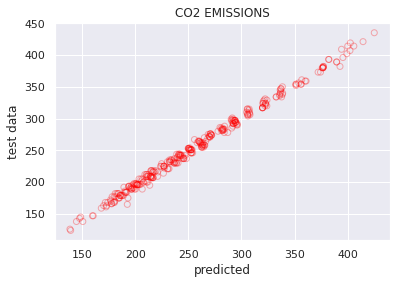

In [ ]:
#esse é o resultado usando 3 parametros para determinar as emissoes de co2, pode-se ver o quao ajustados os dados previstos(em laranja) e os de teste(azul)
t = np.linspace(0,25,len(y_test))

plt.title('CO2 EMISSIONS')
plt.xlabel('predicted')
plt.ylabel('test data')
#plt.scatter(t,Y_pred, lw = 3, color = 'orange',label = 'MultiLinear')
#plt.plot(t,predSVR,'r-', lw = 1,label = 'SVR-e')
plt.scatter(predNN ,y_test, facecolor='None', edgecolor='red', alpha=0.3)
#plt.legend(shadow=True, fancybox=True, )

In [ ]:
 preds = [predNN,predENet,predGBM,predSVR,predXGB]


In [ ]:
# Model Evaluation
from sklearn import metrics

def MAPE(y_test,Y_pred):
  return print('MAPE%',np.mean(np.abs((y_test - Y_pred) / y_test)) * 100)

def eval(y_test,Y_pred):
  
  print('R^2:',metrics.r2_score(y_test, Y_pred))
  print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, Y_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
  print('MAE:', np.sum(np.absolute((y_test - Y_pred)))/len(y_test)) 
  print('Erro max (ppm)', np.abs((y_test - Y_pred).max()))
  print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))


##Evaluation
𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value."""

In [ ]:
MAPE(y_test,predXGB)
eval(y_test,predXGB)
print('___')
MAPE(y_test,predGBM)
eval(y_test, predGBM)
print('___')
MAPE(y_test_c,predXGB2)
eval(y_test, predXGB2)

MAPE% 0.3828291204563428
R^2: 0.998408508211296
Adjusted R^2: 0.998372915743178
MAE: 1.018953008443767
Erro max (ppm) 15.6812744140625
RMSE: 2.591956762086465
___
MAPE% 3.048954142140445
R^2: 0.9596653956942274
Adjusted R^2: 0.9587633438407437
MAE: 7.969605826974076
Erro max (ppm) 38.029990727021016
RMSE: 13.048616032576675
___
MAPE% 0.5417869892014227
R^2: -1.1640746949830985
Adjusted R^2: -1.2124725316121134
MAE: 76.49832785538052
Erro max (ppm) 225.68458557128906
RMSE: 95.57882227135381


In [ ]:
MAPE(y_test,Y_pred)
eval(y_test,Y_pred)

MAPE% 1.3444593107302805e-14
R^2: 1.0
Adjusted R^2: 1.0
MAE: 3.041388532505849e-14
Erro max (ppm) 8.526512829121202e-14
RMSE: 4.39406146344525e-14


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


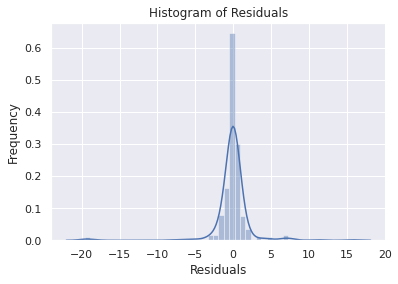

In [ ]:
# Checking how the error are distribuited
sns.distplot(y_test-predXGB)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
predNN1 = [ i[0] for i in predNN]
MAPE(y_test,predNN1)
eval(y_test,predNN1)
print('____')
MAPE(y_test,predXGB)
eval(y_test,predXGB)

MAPE% 2.2043525573442246
R^2: 0.9903750221916927
Adjusted R^2: 0.9901597670969382
MAE: 4.931614623262875
Erro max (ppm) 16.452392578125
RMSE: 6.3741960940514595
____
MAPE% 0.3828291204563428
R^2: 0.998408508211296
Adjusted R^2: 0.998372915743178
MAE: 1.018953008443767
Erro max (ppm) 15.6812744140625
RMSE: 2.591956762086465


In [ ]:
from sklearn import model_selection
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB())]

NameError: ignored